# Cost-Benefit Analysis

In [1]:
import numpy as np
import pandas as pd

#Project parameters
initial_investment = 50000  #Initial cost
years = 5  #Project duration
annual_benefits = 20000  #Benefits per year
annual_costs = 5000  #Costs per year
discount_rate = 0.05  #Discount rate (5%)

#Calculate present value of benefits and costs
years_range = np.arange(1, years + 1)
discount_factors = 1 / (1 + discount_rate) ** years_range

present_value_benefits = np.sum(annual_benefits * discount_factors)
present_value_costs = np.sum(annual_costs * discount_factors)
net_present_value = present_value_benefits - present_value_costs - initial_investment
benefit_cost_ratio = present_value_benefits / (present_value_costs + initial_investment)

results = pd.DataFrame({
    "Year": years_range,
    "Discount Factor": discount_factors,
    "Discounted Benefits": annual_benefits * discount_factors,
    "Discounted Costs": annual_costs * discount_factors
})

print(results)
print(f"\nNet Present Value (NPV): ${net_present_value:.2f}")
print(f"Benefit-Cost Ratio (BCR): {benefit_cost_ratio:.2f}")

#Decision Rule
if net_present_value > 0 and benefit_cost_ratio > 1:
    print("The project is financially viable.")
else:
    print("The project is not financially viable.")

   Year  Discount Factor  Discounted Benefits  Discounted Costs
0     1         0.952381         19047.619048       4761.904762
1     2         0.907029         18140.589569       4535.147392
2     3         0.863838         17276.751971       4319.187993
3     4         0.822702         16454.049496       4113.512374
4     5         0.783526         15670.523329       3917.630832

Net Present Value (NPV): $14942.15
Benefit-Cost Ratio (BCR): 1.21
The project is financially viable.


In [11]:
#Sensitivity Analysis

#Baseline scenario
initial_investment = 50000  
years = 5  
annual_benefits = 20000  
annual_costs = 5000  

#Sensitivity analysis parameters
discount_rates = [0.03, 0.05, 0.07, 0.10]  #Different discount rates
benefit_changes = [-0.2, -0.1, 0, 0.1, 0.2]  #-20%, -10%, base, +10%, +20%
cost_changes = [-0.2, -0.1, 0, 0.1, 0.2]  #-20%, -10%, base, +10%, +20%

#Function to calculate NPV & BCR
def calculate_npv_bcr(annual_benefits, annual_costs, discount_rate):
    years_range = np.arange(1, years + 1)
    discount_factors = 1 / (1 + discount_rate) ** years_range
    pv_benefits = np.sum(annual_benefits * discount_factors)
    pv_costs = np.sum(annual_costs * discount_factors)
    npv = pv_benefits - pv_costs - initial_investment
    bcr = pv_benefits / (pv_costs + initial_investment)
    return npv, bcr

#Sensitivity analysis results
results = []

for dr in discount_rates:
    for b_change in benefit_changes:
        for c_change in cost_changes:
            adj_benefits = annual_benefits * (1 + b_change)
            adj_costs = annual_costs * (1 + c_change)
            npv, bcr = calculate_npv_bcr(adj_benefits, adj_costs, dr)
            results.append([dr, b_change, c_change, npv, bcr])

df_results = pd.DataFrame(results, columns=["Discount Rate", "Benefit Change", "Cost Change", "NPV", "BCR"])

print(df_results)

    Discount Rate  Benefit Change  Cost Change           NPV       BCR
0            0.03            -0.2         -0.2   4956.486246  1.072549
1            0.03            -0.2         -0.1   2666.632653  1.037766
2            0.03            -0.2          0.0    376.779059  1.005169
3            0.03            -0.2          0.1  -1913.074534  0.974556
4            0.03            -0.2          0.2  -4202.928128  0.945753
..            ...             ...          ...           ...       ...
95           0.10             0.2         -0.2  25815.735388  1.396171
96           0.10             0.2         -0.1  23920.342003  1.356708
97           0.10             0.2          0.0  22024.948619  1.319415
98           0.10             0.2          0.1  20129.555234  1.284118
99           0.10             0.2          0.2  18234.161849  1.250660

[100 rows x 5 columns]


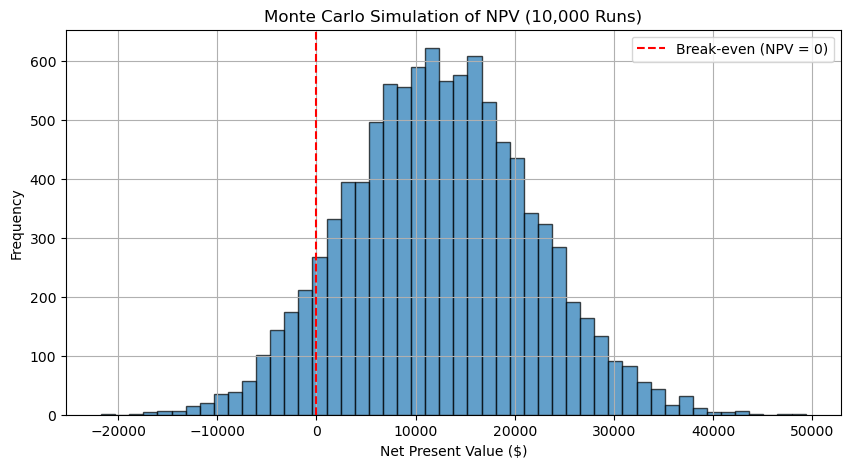

Probability of a profitable project (NPV > 0): 91.23%
Mean NPV: $12,446.55
5th Percentile NPV: $-2,559.15
95th Percentile NPV: $27,859.44


In [15]:
#Montecarlo Simulation

#Simulation parameters
n_simulations = 10000
years = 5
initial_investment = 50000

#Define distributions
#np.random.seed(1663)  
annual_benefits = np.random.normal(20000, 2000, n_simulations)  #Mean 20k, Stdev 2k
annual_costs = np.random.normal(5000, 500, n_simulations)  #Mean 5k, Stdev 500
discount_rates = np.random.uniform(0.03, 0.10, n_simulations)  # Uniform from 3% to 10%

#Function to calculate NPV
def compute_npv(benefit, cost, discount_rate):
    discount_factors = 1 / (1 + discount_rate) ** np.arange(1, years + 1)
    pv_benefits = np.sum(benefit * discount_factors)
    pv_costs = np.sum(cost * discount_factors)
    return pv_benefits - pv_costs - initial_investment

#Simulation
npvs = np.array([compute_npv(benefit, cost, rate) 
                 for benefit, cost, rate in zip(annual_benefits, annual_costs, discount_rates)])

#Compute probability of a positive NPV
prob_positive_npv = np.mean(npvs > 0)

#Results
print(f"Probability of a profitable project (NPV > 0): {prob_positive_npv:.2%}")
print(f"Mean NPV: ${np.mean(npvs):,.2f}")
print(f"5th Percentile NPV: ${np.percentile(npvs, 5):,.2f}")
print(f"95th Percentile NPV: ${np.percentile(npvs, 95):,.2f}")

#Visualization
plt.figure(figsize=(10, 5))
plt.hist(npvs, bins=50, edgecolor="black", alpha=0.7)
plt.axvline(0, color="red", linestyle="--", label="Break-even (NPV = 0)")
plt.xlabel("Net Present Value ($)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation of NPV (10,000 Runs)")
plt.legend()
plt.grid()
plt.show()